# Embedding-Based Image Search

So far, we have used neural networks to:

- Classify images
- Predict counts
- Estimate poses

But neural networks can also produce *embeddings*.

An embedding is a numeric representation of an image in vector space.

Instead of classification, we can perform ***similarity search***.

We will:
1. Extract embeddings from a pretrained CNN
2. Store them in a matrix
3. Compute cosine similarity
4. Retrieve the most similar images

This notebook uses only NumPy — no approximate nearest neighbor libraries required.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

# Load Dataset

IMG_SIZE = 160

(ds,) = tfds.load(
    "tf_flowers",
    split=["train[:20%]"],
    as_supervised=True
)

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

ds = ds.map(preprocess).batch(32)


In [3]:
# Build Embedding Model

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights="imagenet"
)

embedding_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D()
])


In [4]:
# Extract Embeddings

embeddings = []
images_store = []

for images, _ in ds:
    emb = embedding_model(images)
    embeddings.append(emb.numpy())
    images_store.append(images.numpy())

embeddings = np.vstack(embeddings)
images_store = np.vstack(images_store)

print("Embedding matrix shape:", embeddings.shape)


Embedding matrix shape: (734, 1280)


In [5]:
# Cosine Similarity Search

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

query_index = 0
query_embedding = embeddings[query_index]

similarities = np.array([
    cosine_similarity(query_embedding, emb)
    for emb in embeddings
])

top_k = 5
indices = np.argsort(similarities)[-top_k:][::-1]


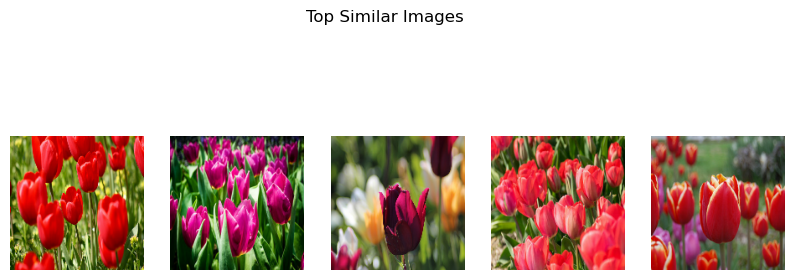

In [6]:
# Visualize Results

plt.figure(figsize=(10,4))

for i, idx in enumerate(indices):
    plt.subplot(1, top_k, i+1)
    plt.imshow(images_store[idx])
    plt.axis("off")

plt.suptitle("Top Similar Images")
plt.show()


## Reflection

We did not classify images.

We compared them in embedding space.

This is the foundation of:

- Image retrieval systems
- Recommendation engines
- Visual search
- Metric learning

Classification is not the only way to use neural networks.

Representation learning enables entirely new applications.
